# Python, Data, 2025

---

* Úvod do NUMPY,
* základy NUMPY,
    - atributy,
    - metody,
    - spojování,
    - rozdělování,
    * cvičení 1,
    * cvičení 2,
* univerzální funkce, ~ufuncs,
    - úvod
    - typy funkcí
    * cvičení 3.

## Úvod do NUMPY

---

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.QQOtOJPya2YEO6IkVBnYjQHaDV%26pid%3DApi&f=1&ipt=245c27df971ff24527ca317988f6feda8b14851ef0a889fda7d5a10d114dc5e6&ipo=images" width="300" style="margin-left:auto; margin-right:auto"/>

### Proč umět NUMPY

---

Je to univerzální knihovna pro práci **s numerickými daty** v jazyce Python.

Funkcionalita této knihovny je využívána (skrze API) v jiných knihovnách jako *Pandas*, *SciPy*, *Matplotlib*, *scikit-learn*, *scikit-image*.

<br>

Nabízí efektivní nástroje pro práci **s většími datovými strukturami**.

Usnadňuje práci se **vícerozměrnými poli** a **maticovými datovými strukturami**.

### Kde zjistit více informací

---

Dokumentaci najdeš [zde](https://numpy.org/doc/stable/index.html#).

Zdrojový kód najdeš [zde](https://github.com/numpy/numpy).

### Jak jej nainstaluji

---

Instalace knihovny obecně (doporučeno v rámci virtuálního prostředí):

In [1]:
# !pip install numpy

...nebo:

In [2]:
# !conda install numpy

<br>

Nahrávání knihovny:

In [3]:
import numpy

In [4]:
import numpy as np

In [5]:
from numpy import array

<br>

Používaná verze knihovny:

In [6]:
numpy.__version__

'1.24.4'

### Srovnání datových typů

---

Efektivní práce s daty si zakládá na tom, jak jsou data uložená.

Proto je zásadní tušit jak objekty zpracovává **klasický Python** a `numpy`.

In [7]:
x = 10
x = 10.0
x = "deset"

*Dynamické typování* v Pythonu vypadá jako dobrý nápad.

Přináší jistou flexibilitu a jednodušší používání.

Také s sebou ovšem nese jisté povinnosti, které by obyčejná proměnná **neměla normálně zpracovávat**.

V ukázce neukládáš pouze hodnoty, ale další doprovodné informace:
* **počet referencí**, kvůli alokaci/dealokaci paměti,
* **typ kódovací sady**,
* **velikost** následujících dat.

#### LIST v Pythonu

---

In [8]:
muj_list = [10, 10.0, "deset"]

In [9]:
datove_typy_listu = [type(hodnota) for hodnota in muj_list]

In [10]:
datove_typy_listu

[int, float, str]

<br>

Je jasné, že tento *komfort* sebou nese i svoji cenu.

Protože toho každá hodnota s sebou nese další doplňující informace (datový typ, kódování, ...).

I kdyby byly hodnoty stejného datové typu, přesto s sebou přenášejí řadu balastu.

Tomu se snaží knihovna `numpy` pomáhat.

In [11]:
from numpy import array

In [12]:
ciselne_pole = array(range(6))

In [13]:
ciselne_pole

array([0, 1, 2, 3, 4, 5])

In [14]:
ciselne_pole.dtype

dtype('int64')

In [15]:
type(ciselne_pole)

numpy.ndarray

<br>

Na rozdíl od datového typu`list` v jazyce Python, pole v `numpy` obsahují stejný datový typ.

Pokud tomu tak není, `numpy` provede *upcast* (představ si datovou konverzi):

In [16]:
mix_desetinne_cele_hodnoty = array((1, 2, 3, 3.1416))

In [17]:
mix_desetinne_cele_hodnoty

array([1.    , 2.    , 3.    , 3.1416])

In [18]:
mix_desetinne_cele_hodnoty.dtype

dtype('float64')

<br>

Pokud potřebuješ dodržet konkrétní datový typ, použij explicitně *parametr* `dtype`:

In [19]:
jen_cele = array((1, 2, 3, 3.1416), dtype="int64")

In [20]:
jen_cele

array([1, 2, 3, 3])

<br>

Datové typy se snaží implicitně konvertovat. Pokud je to možné.

In [22]:
# jen_cele = array((1, 2, "tři", 3.1416), dtype="int64")  # "ValueError"

ValueError: invalid literal for int() with base 10: 'tři'

In [21]:
# int("tři")  # "ValueError"

ValueError: invalid literal for int() with base 10: 'tři'

In [23]:
jen_cele

array([1, 2, 3, 3])

<br>

`numpy` nabízí obrovskou škálu rychlých a efektivních způsobů vytváření polí a manipulace s číselnými daty v nich.

Pracuje s homogenními sekvenčnímy objekty.

#### Proč používat NUMPY?

---

Pole v `numpy` jsou rychlejší a kompaktnější než `list` v Pythonu.

Pole spotřebovává **méně paměti a pohodlně se používá** (určení datových typů,..).

```
Země   Počet obyv.   Rozloha
česká republika 11  75
německo         22  115
rakousko        15  70
```

In [24]:
import numpy as np
from pandas import DataFrame

In [25]:
zeme_df = DataFrame(
    data=[[11, 79], [66, 243], [196, 924]],
    index=["CZE", "UK", "Nigeria"],
    columns=["population", "surface_area"]
)

In [26]:
zeme_df.head()

,population,surface_area
CZE,11,79
UK,66,243
Nigeria,196,924


In [27]:
zeme_arr = np.array(zeme_df)

In [28]:
zeme_arr

array([[ 11,  79],
       [ 66, 243],
       [196, 924]])

In [29]:
zeme_arr.dtype

dtype('int64')

Konzistentní datové typy knihovny `numpy`, které podporují hromadu navazujících funkcí.

<br>

## Základy NUMPY

---

Protože je `numpy` postaven na jazyku C, přebírá také podobné datové typy.

Některé datové typy:
    
| Datový typ v `numpy` | Popis |
| :- | :- |
| `bool_` | boolean `True`, `False` |
| `int16` | celá čísla (bajty od -32768 do 32767) |
| `int32` | celá čísla (bajty od -2147483648 do 2147483647)) |
| `int64` | celá čísla (bajty od -9223372036854775808 to 9223372036854775807) |
| `float64` | desetinné čísla |
| `complex64` | komplexní čísla, reprezentovaná dvěma 64-bitovými dese. čísly |

<br>

Dále `numpy` poskytuje `array` objekty.

In [30]:
muj_list = [1, 2, 3]                      # 1D pole, ~ list, tuple
muj_2D_list = [[1, 2], [3, 4]]            # 2D pole, ~ matice ~ nestovaný list, tuple

Ty slouží jako prostředky pro elegantní manipulaci s daty (znáš z `pandas`).

Základní operace pro `array`:
* **atributy**,
* **indexování**,
* **řezání**,
* **RESHAPE**,
* **JOIN** a **MERGE** --> *konkatenace*, *split*

### Vytvoření ARRAY

---

In [31]:
import numpy as np

In [32]:
from numpy import array

<br>

#### Jak vytvořit array pomocí built-in sekvencí?

---

Můžeš jednoduše konvertovat built-in **sekvenční datové typy** v Pythonu na `numpy` pole:

In [33]:
muj_range = range(3)
muj_list = [3, 4, 5]
muj_tuple = (6, 7, 8)

In [ ]:
# import numpy as np

In [34]:
muj_list_arr = np.array(muj_list)
muj_tuple_arr = np.array(muj_tuple)
muj_range_arr = np.array(muj_range)

In [ ]:
# from numpy import array

In [35]:
muj_list_arr = array(muj_list)
muj_tuple_arr = array(muj_tuple)
muj_range_arr = array(muj_range)

In [36]:
muj_list_arr

array([3, 4, 5])

In [37]:
type(muj_list_arr)

numpy.ndarray

<br>

Atribut `dtype` neví nic o datovém typu objektu, jen jakým objekty je naplněný:

In [38]:
muj_list_arr.dtype

dtype('int64')

<br>

Pokud chci ověřit, že jde o `array` objekt:

In [ ]:
type(muj_tuple_arr)

In [39]:
isinstance(muj_list_arr, np.ndarray)

True

Pokud chci ověřit, jestli je hodnota na nultém indexu celé číslo `int`:

In [40]:
isinstance(muj_list_arr[0], int)

False

In [41]:
type(muj_tuple_arr[0])

numpy.int64

In [43]:
isinstance(muj_list_arr[0], numpy.int64)

True

In [42]:
isinstance(muj_list_arr[0], np.int64)

True

<br>

#### Jak vytvořit array pomocí nul?

---

In [44]:
jen_nuly = np.zeros([2, 5])  # Royal (rows) Crown (columns) cola 

In [45]:
jen_nuly

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [46]:
jen_nuly.dtype

dtype('float64')

<br>

Pro jiný datový typ je potřeba explicitně zadat hodnotu:

In [47]:
jen_nuly = np.zeros([2, 5], dtype='int64')

In [48]:
jen_nuly

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

<br>

#### Jak vytvořit array pomocí jedniček?

---

In [49]:
jen_jednicky = np.ones(shape=(2, 3), dtype=int)

Definice nového pole je možná i s klíčovými argumenty (parametr `shape`).

In [ ]:
# np.ones?

In [50]:
jen_jednicky.dtype

dtype('int64')

In [51]:
jen_jednicky

array([[1, 1, 1],
       [1, 1, 1]])

<br>

#### Jak vytvořit array pomocí defaultní výplňové hodnoty?

---

In [52]:
jen_pi = np.full(shape=(3, 5), fill_value=np.pi)  # math, math.pi

In [53]:
jen_pi

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265]])

<br>

#### Jak vytvořit array pomocí rozsahů?

---

Velmi intuitivně zadavaná datová struktura, podobně jako u Python `range`:

In [54]:
interval_arr = np.arange(start=0, stop=10, step=1)

In [55]:
interval_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
type(interval_arr)

numpy.ndarray

In [57]:
interval_arr.dtype

dtype('int64')

<br>

Narozdíl od standardní knihovny umí `numpy` arrange objekt tvořit intervaly i s pomocí desetinných čísel.

In [58]:
interval_arr = np.arange(start=0, stop=1, step=0.1, dtype='float64')

In [59]:
interval_arr

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

<br>

#### Jak vytvořit array pomocí náhodných celých čísel?

---

In [60]:
random_hodnoty = np.random.randint(low=0, high=6, size=(2, 4))

In [61]:
random_hodnoty

array([[3, 0, 3, 3],
       [3, 3, 1, 5]])

In [62]:
type(random_hodnoty)

numpy.ndarray

In [63]:
poradi = len(range(10))  # 10

<br>

Občas je vhodnější tvořit rozsahy dynamicky, než statickou (hárdkódovanou) hodnotou:

In [64]:
random_hodnoty = np.random.randint(low=0, high=66, size=poradi)

In [65]:
tuple(random_hodnoty)

(8, 49, 65, 59, 12, 19, 49, 0, 16, 21)

<br>

#### Jednodimenzionální pole

---

In [66]:
m1 = np.random.randint(low=1, high=10, size=6)

In [67]:
m1

array([6, 3, 6, 8, 2, 3])

<br>

Tedy prakticky jednoduché pole, které se na první pohled neliší tolik od `list`.

In [68]:
import time

<br>

Zadání délky pole:

In [69]:
N = 10_000_000

<br>

Zpracování pomocí standardního Pythonu:

In [70]:
lst = list(range(N))
start = time.time()
lst = [x * 2 for x in lst]
print("List:", time.time() - start)

List: 0.760406494140625


<br>

Zpracování pomocí `numpy`:

In [71]:
arr = np.arange(N)
start = time.time()
arr = arr * 2
print("NumPy:", time.time() - start)

NumPy: 0.020014047622680664


<br>

Numpy nebudeš potřebovat, pokud:
- pokud zpracováváš malá nebo **smíšená data** (např. `[1, "jablko", True]`)
- pokud nepoužíváš numerické výpočty

#### Dvoudimenzionální pole

---

In [72]:
m2 = np.random.randint(10, size=(2, 3))

In [73]:
m2

array([[0, 8, 6],
       [1, 4, 9]])

<br>

Definicí oznamuješ:
1. `10`, vyber náhodné celé čísla z intervalu `0-9`,
2. vytvoř **2 řádky**,
3. .. o **3 sloupcích**.

#### Třídimenzionální pole

---

In [74]:
m3 = np.random.randint(10, size=(2, 3, 4))  # implicitní zadání "high"

In [75]:
m3

array([[[2, 3, 8, 7],
        [5, 5, 2, 5],
        [3, 6, 7, 5]],

       [[3, 4, 8, 4],
        [9, 1, 3, 8],
        [8, 9, 8, 6]]])

<br>

Definicí oznamuješ:
1. `10`, vyber náhodné celé čísla z intervalu `0-9`,
2. vytvoř **2 matice**,
3. .. o **3 řádcích**,
4. .. a **4 sloupcích**.

<br>

### Dostupné atributy pro ARRAY objekt

---



Pokud budeš potřebovat prozkoumat existující `array`, můžeš vyzkoušet tyto atributy a metody:
1. **Dimenze**,
2. **tvar**,
3. **velikost**,
4. **datové typy**,
5. **bajtová velikost**.

#### Dimenze matice

---

Kontrola, zda máš vektor, matici nebo vícerozměrné pole.

In [76]:
m3.ndim

3

In [77]:
m2.ndim

2

In [78]:
m1.ndim

1

Potřebné pokud chceš:
- přizpůsobení vstupu modelům (např. reshape pro strojové učení).
- zpracování obrázků (např. RGB obrázek má ndim == 3, černobílý ndim == 2).

<br>

#### Tvar matice

---

Vrací tuple s počtem prvků v každé dimenzi.

In [79]:
m3.shape

(2, 3, 4)

In [80]:
m2.shape

(2, 3)

In [82]:
m1.shape

(6,)

Kdy to potřebuješ?
- Reshape dat pro vstup do neuronových sítí (`X.reshape(-1, 1)`)
- Slučování (concatenace) polí – kontrola rozměrů
- U obrázků: (výška, šířka, kanály)

Obdoba, pomocí které řešíš rozměry tabulky v knihovně `pandas`.

<br>

#### Velikost matice

---

Atribut zobrazí celkový počet prvků v poli.

Kdy to potřebuješ?
- Výpočty, kde ti nezáleží na tvaru, ale jen na počtu dat
- Pro porovnání velikosti datových struktur
- Iterace přes všechny prvky

In [84]:
m3.size

24

In [83]:
m2.size

6

In [85]:
m1.size

6

<br>

#### Datový typ

---

In [86]:
m3.dtype

dtype('int64')

<br>

#### Velikost v bajtech

---

Kdy to potřebuješ?

- Když sleduješ **paměťovou náročnost** dat (např. u velkých datasetů)
- **Optimalizace výkonu** – kolik paměti si objekt žádá
- **V datové analytice / streamování** – odhad kolik se vejde do RAM nebo bufferu

In [87]:
m3.nbytes

192

In [88]:
arr = np.ones((1000, 1000), dtype=np.float64)

In [89]:
print(arr.nbytes)  # 8 000 000 bajtů = 8 MB

8000000


<br>

Jde o součin atributů **size** * **itemsize**.

<br>

### Indexování ARRAY

---



Postup vypadá podobně jako pro sekvenční datové typy v Pythonu.

Pomocí **hranaté závorky** a **celého čísla**, můžeš zpřístupnit konkrétní hodnotu/ hodnoty.

<br>

#### Jednodimenzionální

In [90]:
m1

array([6, 3, 6, 8, 2, 3])

In [91]:
m1[0]

6

In [92]:
m1[1]

3

In [93]:
m1[-1]

3

<br>

#### Dvoudimenzionální

---

In [94]:
m2

array([[0, 8, 6],
       [1, 4, 9]])

In [95]:
m2[0]

array([0, 8, 6])

In [96]:
m2[0][0]

0

In [97]:
m2[0, 0]

0

<br>

Pomocí indexů zpřístupníš hodnotu na konkrétní pozici a můžeš ji modifikovat:

In [98]:
m2

array([[0, 8, 6],
       [1, 4, 9]])

In [99]:
el_m2 = m2[0, 0]

In [100]:
el_m2

0

In [101]:
m2[0, 0] = 11

In [102]:
m2

array([[11,  8,  6],
       [ 1,  4,  9]])

<br>

Dávej pozor na datové typy. Pokud budeš chtít přidat jiný datový typ:

In [105]:
m2.dtype

dtype('int64')

In [103]:
m2[0, 0] = 11.111

In [104]:
m2

array([[11,  8,  6],
       [ 1,  4,  9]])

Výsledek bude na pozadí *truncatovaný*.

In [107]:
# m2[0, 0] = "jedenáct"  # "ValueError"

<br>

### Slicing ARRAY

---



Podobně jako u zpřístupňování jednotlivých hodnot, můžeš tvořit *subarrays*.

Postup je opět velmi podobný pro *slicing* u sekvenčních hodnot.

Je doporučené udávat všechny argumenty, protože implicitní dosazování defaultních hodnot může mást uživatele.

In [108]:
zeme_arr

array([[ 11,  79],
       [ 66, 243],
       [196, 924]])

In [109]:
zeme_arr[0:2]

array([[ 11,  79],
       [ 66, 243]])

In [110]:
zeme_arr[-2:]

array([[ 66, 243],
       [196, 924]])

<br>

Pro více dimenzí, dva řádky a jeden sloupec:

In [111]:
dva_radky_jeden_sloupec = zeme_arr[:2, :1]

In [112]:
dva_radky_jeden_sloupec

array([[11],
       [66]])

In [113]:
dva_radky_jeden_sloupec = zeme_arr[[1, 2], :1]

Je možné slicovat pomocí specifických indexů pro tabulku.

<br>

In [116]:
dva_radky_jeden_sloupec

array([[ 66],
       [196]])

In [117]:
dva_radky_jeden_sloupec = zeme_arr[::2, :1]  # step=2

In [118]:
dva_radky_jeden_sloupec

array([[ 11],
       [196]])

<br>

Pokud pracuješ se *subarrays*, používáš pohledy originální hodnoty.

V Pythonu to byla většinou kopie, původního objektu:

In [120]:
zeme_arr

array([[ 11,  79],
       [ 66, 243],
       [196, 924]])

In [119]:
dva_radky_jeden_sloupec

array([[ 11],
       [196]])

In [121]:
dva_radky_jeden_sloupec[0, 0] = 13

In [122]:
dva_radky_jeden_sloupec

array([[ 13],
       [196]])

In [123]:
zeme_arr

array([[ 13,  79],
       [ 66, 243],
       [196, 924]])

<br>

Pokud potřebuješ přesto nachystat kopii a ponechat původní hodnoty nezměněné, vyzkoušej metodu `copy`:

In [124]:
kopie_dva_radky_jeden_sloupec = zeme_arr[:2, :1].copy()  # Pozor!

In [125]:
kopie_dva_radky_jeden_sloupec

array([[13],
       [66]])

In [126]:
kopie_dva_radky_jeden_sloupec[0, 0] = 11

In [127]:
kopie_dva_radky_jeden_sloupec

array([[11],
       [66]])

In [128]:
zeme_arr

array([[ 13,  79],
       [ 66, 243],
       [196, 924]])

<br>

### Přetváření ARRAY

---



Jestli budeš potřebovat změnit tvar pole nebo matice, vyzkoušej metodu `reshape`:

In [129]:
zeme_df

,population,surface_area
CZE,11,79
UK,66,243
Nigeria,196,924


In [130]:
zeme_arr[0, 0] = 11

In [131]:
zeme_arr

array([[ 11,  79],
       [ 66, 243],
       [196, 924]])

<br>

Vytvoříš si jednodimenzionální pole s pomocí funkce `arange`:

In [132]:
pole_1D = np.arange(1, 11)

In [133]:
pole_1D

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<br>

Nachystám 2D pole, matici, pomocí metody `reshape`:

In [134]:
matice = pole_1D.reshape(2, 5)

In [135]:
matice

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

<br>

Pomocí metody `reshape` můžeš také měnit **řádkový vektor za sloupcový**:

In [136]:
import numpy as np

In [137]:
radkovy_vektor = np.array((11, 22, 33, 44))

In [138]:
radkovy_vektor

array([11, 22, 33, 44])

In [139]:
r =  radkovy_vektor[np.newaxis, :]

In [140]:
r

array([[11, 22, 33, 44]])

In [141]:
r.T

array([[11],
       [22],
       [33],
       [44]])

In [142]:
radkovy_vektor[:, np.newaxis]

array([[11],
       [22],
       [33],
       [44]])

In [ ]:
x = np.expand_dims(radkovy_vektor, axis=1)

In [ ]:
x = np.expand_dims(radkovy_vektor, axis=0)

In [ ]:
# np.expand_dims?

In [ ]:
x

#### Ukázka

---

Potřebuješ převést 1D pole na 2D matici, kde budeš mít 7 hodnot na řádek.

In [143]:
temp_data = np.random.uniform(15, 36, size=30*7)  # 1D

In [144]:
temp_data

array([33.07199097, 28.10447555, 15.40469671, 19.79651665, 29.31999401,
       32.34625857, 19.52112496, 17.20188239, 19.85208063, 25.8826323 ,
       34.72165461, 31.72000348, 17.68303765, 22.36672798, 18.70780875,
       25.9527875 , 17.07641568, 24.57816638, 27.8670483 , 30.42768052,
       35.17623972, 21.47064083, 25.76037341, 17.75347059, 21.59829276,
       17.51609162, 16.07627734, 20.95636921, 21.13793958, 28.09422961,
       22.071702  , 26.01484565, 15.29288982, 30.63176655, 31.06896258,
       19.91899971, 22.42831061, 35.38031307, 30.54630149, 27.20682771,
       32.52329513, 30.26451463, 17.75580601, 16.51416411, 34.28019956,
       16.00755806, 18.41881921, 35.96921656, 17.6454205 , 33.05364984,
       22.98906593, 25.05457733, 18.90831848, 22.62087569, 24.88828036,
       16.93666697, 31.67822685, 17.87873849, 35.91581475, 19.36303681,
       24.28972499, 17.79838621, 22.02012983, 31.0898541 , 16.29348221,
       18.56301893, 31.63241688, 33.15311248, 21.5435544 , 30.07

In [146]:
temp_data.shape

(210,)

In [145]:
temp_data.ndim

1

In [ ]:
############ Po Ut St Ct Pa So Ne
#01. tyden
#02. tyden
#03.
#...

In [147]:
temp_data.reshape(2, 7)  # ValueError

ValueError: cannot reshape array of size 210 into shape (2,7)

Opatrně na nesoulad hodnot.

Tvůj původní array má **210 prvků → tedy `size` = 210**

Při `reshape(2, 7)` říkáš:
*"Chci z těchto dat vytvořit matici 2 řádků a 7 sloupců"*

Ale **2 × 7 = 14** → a **14 ≠ 210**/

Proto interpret oznamuje chybu, protože velikosti nesouhlasí.

In [150]:
tydenni_data = temp_data.reshape(-1, 7)

Pokud zadáš argument `-1` udělá interpret 2D matici, kde každý řádek má 7 sloupců — a `numpy` dopočítá, kolik těch řádků je potřeba.“

In [151]:
tydenni_data.shape

(30, 7)

In [153]:
tydenni_data.ndim

2

In [154]:
tydenni_data = temp_data.reshape(20, 10)

ValueError: cannot reshape array of size 210 into shape (20,10)

In [155]:
tydenni_data = temp_data.reshape(-1, 10)

In [156]:
tydenni_data

array([[33.07199097, 28.10447555, 15.40469671, 19.79651665, 29.31999401,
        32.34625857, 19.52112496, 17.20188239, 19.85208063, 25.8826323 ],
       [34.72165461, 31.72000348, 17.68303765, 22.36672798, 18.70780875,
        25.9527875 , 17.07641568, 24.57816638, 27.8670483 , 30.42768052],
       [35.17623972, 21.47064083, 25.76037341, 17.75347059, 21.59829276,
        17.51609162, 16.07627734, 20.95636921, 21.13793958, 28.09422961],
       [22.071702  , 26.01484565, 15.29288982, 30.63176655, 31.06896258,
        19.91899971, 22.42831061, 35.38031307, 30.54630149, 27.20682771],
       [32.52329513, 30.26451463, 17.75580601, 16.51416411, 34.28019956,
        16.00755806, 18.41881921, 35.96921656, 17.6454205 , 33.05364984],
       [22.98906593, 25.05457733, 18.90831848, 22.62087569, 24.88828036,
        16.93666697, 31.67822685, 17.87873849, 35.91581475, 19.36303681],
       [24.28972499, 17.79838621, 22.02012983, 31.0898541 , 16.29348221,
        18.56301893, 31.63241688, 33.15311248

In [157]:
nezname_sloupce = temp_data.reshape(20, 5)

ValueError: cannot reshape array of size 210 into shape (20,5)

In [158]:
nezname_sloupce = temp_data.reshape(20, -1)

ValueError: cannot reshape array of size 210 into shape (20,newaxis)

In [164]:
r2 =  temp_data[np.newaxis, :]

In [165]:
r2 = r2.T

In [166]:
r2

array([[33.07199097],
       [28.10447555],
       [15.40469671],
       [19.79651665],
       [29.31999401],
       [32.34625857],
       [19.52112496],
       [17.20188239],
       [19.85208063],
       [25.8826323 ],
       [34.72165461],
       [31.72000348],
       [17.68303765],
       [22.36672798],
       [18.70780875],
       [25.9527875 ],
       [17.07641568],
       [24.57816638],
       [27.8670483 ],
       [30.42768052],
       [35.17623972],
       [21.47064083],
       [25.76037341],
       [17.75347059],
       [21.59829276],
       [17.51609162],
       [16.07627734],
       [20.95636921],
       [21.13793958],
       [28.09422961],
       [22.071702  ],
       [26.01484565],
       [15.29288982],
       [30.63176655],
       [31.06896258],
       [19.91899971],
       [22.42831061],
       [35.38031307],
       [30.54630149],
       [27.20682771],
       [32.52329513],
       [30.26451463],
       [17.75580601],
       [16.51416411],
       [34.28019956],
       [16

In [168]:
r2.reshape(21, -1)  # ndim, shape, size

array([[33.07199097, 28.10447555, 15.40469671, 19.79651665, 29.31999401,
        32.34625857, 19.52112496, 17.20188239, 19.85208063, 25.8826323 ],
       [34.72165461, 31.72000348, 17.68303765, 22.36672798, 18.70780875,
        25.9527875 , 17.07641568, 24.57816638, 27.8670483 , 30.42768052],
       [35.17623972, 21.47064083, 25.76037341, 17.75347059, 21.59829276,
        17.51609162, 16.07627734, 20.95636921, 21.13793958, 28.09422961],
       [22.071702  , 26.01484565, 15.29288982, 30.63176655, 31.06896258,
        19.91899971, 22.42831061, 35.38031307, 30.54630149, 27.20682771],
       [32.52329513, 30.26451463, 17.75580601, 16.51416411, 34.28019956,
        16.00755806, 18.41881921, 35.96921656, 17.6454205 , 33.05364984],
       [22.98906593, 25.05457733, 18.90831848, 22.62087569, 24.88828036,
        16.93666697, 31.67822685, 17.87873849, 35.91581475, 19.36303681],
       [24.28972499, 17.79838621, 22.02012983, 31.0898541 , 16.29348221,
        18.56301893, 31.63241688, 33.15311248

In [170]:
20 * 10 == r2.size

False

<br>

Opatrně na počet hodnot v rámci dimenzí.

Pokud není možné vyplnit všechny hodnoty, nový rozměr nevznikne.

<br>

### Spojování a rozdělování

---



Předchozí ukázky se vztahovaly pouze k jednomu poli, k jedné matici.

Teď uvidíš, jak můžeš kombinovat několik těchto typů objektu.

#### Spojování

---

Pomocí metody `concatenate` spojíš dvě pole nebo dvě matice nebo více objektů:

In [171]:
pole_1 = np.arange(1, 6)
pole_2 = np.array((6, 7, 8))

In [172]:
pole_1

array([1, 2, 3, 4, 5])

In [173]:
pole_2

array([6, 7, 8])

In [175]:
# spojene_pole = np.concatenate(pole_1, pole_2)  # TypeError

In [176]:
spojene_pole = np.concatenate([pole_1, pole_2])

In [177]:
spojene_pole

array([1, 2, 3, 4, 5, 6, 7, 8])

In [178]:
pole_2D_1 = np.random.randint(low=-15, high=15, size=(3, 2))

In [179]:
pole_2D_1

array([[ 1, 12],
       [-1, 12],
       [-5,  3]])

In [180]:
pole_2D_2 = np.random.randint(low=-15, high=15, size=(5, 2))

In [181]:
pole_2D_2

array([[ 12,  -1],
       [ 10,  11],
       [ 14,  -4],
       [  8,  -7],
       [  2, -11]])

In [182]:
pole_2D_3 = np.random.randint(low=-15, high=15, size=(3, 2))

In [183]:
pole_2D_3

array([[ 2, -7],
       [-1, -2],
       [ 5, 12]])

In [184]:
spojene_matice = np.concatenate([pole_2D_1, pole_2D_3], axis=1)

In [185]:
spojene_matice

array([[ 1, 12,  2, -7],
       [-1, 12, -1, -2],
       [-5,  3,  5, 12]])

In [186]:
# spojene_matice = np.concatenate([pole_2D_1, pole_2D_2], axis=1)  # ValueError

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 5

In [187]:
spojene_matice = np.concatenate([pole_2D_1, pole_2D_2], axis=0)

In [188]:
spojene_matice

array([[  1,  12],
       [ -1,  12],
       [ -5,   3],
       [ 12,  -1],
       [ 10,  11],
       [ 14,  -4],
       [  8,  -7],
       [  2, -11]])

<br>

Pokud nemáš pole nebo matice stejného rozměru, je lepší pracovat s funkcemi:
1. `vstack`, vertikální napojení,
2. `hstack`, horizontální napojení,

In [189]:
pole_1

array([1, 2, 3, 4, 5])

In [190]:
pole_2D_1

array([[ 1, 12],
       [-1, 12],
       [-5,  3]])

In [191]:
rozsirene_2D = np.concatenate([pole_1, pole_2D_1])  # ValueError

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
# rozsirene_2D = np.vstack([pole_1, pole_2D_1])  # ValueError

In [192]:
rozsirene_2D = np.vstack([pole_1[:2], pole_2D_1])

In [193]:
rozsirene_2D

array([[ 1,  2],
       [ 1, 12],
       [-1, 12],
       [-5,  3]])

#### Rozdělování

---

Opakem spojování polí a matic je rozdělování, které je možné provést pomocí funkcí:
1. `split`,
2. `hsplit`,
3. `vsplit`

In [194]:
rada_arr = np.random.randint(low=100, high=200, size=(12))

In [195]:
rada_arr.size

12

In [196]:
rada_arr

array([128, 180, 133, 149, 109, 152, 143, 164, 185, 105, 110, 146])

In [197]:
r1, r2, r3 = np.split(rada_arr, [4, 8])

In [199]:
r1

array([128, 180, 133, 149])

In [202]:
r1, r2, r3 = np.split(rada_arr, [6])  # ValueError

ValueError: not enough values to unpack (expected 3, got 2)

In [203]:
np.split(rada_arr, [6])

[array([128, 180, 133, 149, 109, 152]), array([143, 164, 185, 105, 110, 146])]

<br>

Takže dělení probíhá pomocí dělících indexů.

Tedy máš vždy N indexů a N + 1 polí.

In [ ]:
matice = rada_arr.reshape(3, 4)

In [ ]:
matice

In [ ]:
leve_sl, prave_sl = np.hsplit(matice, 2)

In [ ]:
leve_sl

In [ ]:
prave_sl

In [ ]:
# leve_sl, prave_sl = np.hsplit(matice, 3)  # ValueError

In [ ]:
# prvni_sl, druhy_sl, treti_sl = np.hsplit(matice, 3) # ValueError

In [ ]:
prvni_sl, druhy_sl, treti_sl, ctvrty_sl = np.hsplit(matice, 4)

In [ ]:
prvni_sl, druhy_sl, treti_sl, ctvrty_sl

<br>

#### **🧠 CVIČENÍ 🧠, procvič si základy v NUMPY**

---

In [204]:
import numpy as np

#### Použij NUMPY funkci, která vytvoří 1D pole od 5, do 50 po 5ti

---

In [206]:
nove_pole = np.arange(start=5, stop=51, step=5)

In [207]:
nove_pole

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    np.arange(5, 51, 5)
    ```
</details>

#### Jak vytvoříš stejné pole pomocí funkce RANGE a LIST?

In [208]:
pole_range = range(5)
pole_list = list((1, 2, 3, 4, 5))

In [209]:
numpy_range = array(pole_range)
numpy_list = array(pole_list)

In [210]:
numpy_range

array([0, 1, 2, 3, 4])

In [211]:
numpy_list

array([1, 2, 3, 4, 5])

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    np.array([cislo for cislo in range(5, 51, 5)])
    ```
</details>

#### Jak můžeš vytvořit pole z kapitálek písmen od A do Z?

In [212]:
# I. možnost
import string

In [222]:
numpy_pismena = array(tuple(string.ascii_uppercase))

In [223]:
numpy_pismena

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='<U1')

In [228]:
# II. možnost
range(ord('A'), ord('Z'))

range(65, 90)

In [231]:
chr(67)

'C'

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    np.array([chr(index) for index in range(ord("A"), ord("Z") + 1)])
    ```
</details>

#### Jak můžeš vytvořit 1D pole z 6ti náhodných čísel od 1 do 10 (včetně 10)?

In [250]:
numpy_nahodne = np.random.randint(1, 11, size=6)

In [251]:
numpy_nahodne

array([7, 9, 8, 3, 4, 1])

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    np.random.randint(1, 10, size=6)
    ```
</details>

#### Jak vytvoříš 2D matici 4 x 5 pole s náhodnými čísly od 1 do 50 (včetně 50)?

In [252]:
numpy_nahodne = np.random.randint(1, 51, size=(4, 5))

In [253]:
numpy_nahodne

array([[32, 41, 36, 25, 25],
       [34,  9, 18, 46, 16],
       [ 5, 26, 17, 12,  3],
       [14, 16, 20, 11, 13]])

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    numpy.random.randint(1, 51, size=(4, 5))
    ```
</details>

<br>

#### **🧠 CVIČENÍ 🧠, procvič si základy v NUMPY**

---

Máš teplotní záznamy získané ze dvou různých meteorologických stanic.

Každá stanice poskytuje teplotní záznamy za posledních 10 dní, které jsou uloženy ve formátu seznamu. Tvým úkolem je:

In [254]:
import numpy as np

In [255]:
stanice_c1_teploty = [21.5, 22.3, 20.7, 19.8, 23.1, 22.6, 20.4, 21.8, 22.9, 21.2]
stanice_c2_teploty = [18.5, 19.1, 18.7, 17.8, 21.3, 20.6, 18.5, 19.7, 20.5, 19.2]

#### Převeď seznamy teplot na NumPy pole.

In [256]:
c1_numpy = np.array(stanice_c1_teploty)
c2_numpy = np.array(stanice_c2_teploty)

#### Spoj oba záznamy do jednoho pole pomocí funkce 'concatenate'.

In [257]:
spojene_numpy = np.concatenate([c1_numpy, c2_numpy])

In [258]:
spojene_numpy

array([21.5, 22.3, 20.7, 19.8, 23.1, 22.6, 20.4, 21.8, 22.9, 21.2, 18.5,
       19.1, 18.7, 17.8, 21.3, 20.6, 18.5, 19.7, 20.5, 19.2])

In [259]:
spojene_numpy.ndim

1

#### Rozděl sloučené pole na dvě části: prvních 5 dní a druhých 5 dní.

In [261]:
spojene_numpy.shape

(20,)

In [262]:
upraveny_rozmer = spojene_numpy.reshape(2, 10)

In [263]:
upraveny_rozmer

array([[21.5, 22.3, 20.7, 19.8, 23.1, 22.6, 20.4, 21.8, 22.9, 21.2],
       [18.5, 19.1, 18.7, 17.8, 21.3, 20.6, 18.5, 19.7, 20.5, 19.2]])

In [270]:
prvnich_pet_dni, druhych_pet_dni = np.hsplit(upraveny_rozmer, 2)

In [271]:
prvnich_pet_dni

array([[21.5, 22.3, 20.7, 19.8, 23.1],
       [18.5, 19.1, 18.7, 17.8, 21.3]])

In [272]:
druhych_pet_dni

array([[22.6, 20.4, 21.8, 22.9, 21.2],
       [20.6, 18.5, 19.7, 20.5, 19.2]])

#### Vypočítej průměrnou teplotu pro prvních 5 dní a druhých 5 dní.

In [273]:
prumer_prvnich_pet = np.mean(prvnich_pet_dni)
prumer_druhych_pet = np.mean(druhych_pet_dni)

#### Motivace: grafický výstup

---

In [274]:
import numpy as np
import matplotlib.pyplot as plt

In [275]:
arr = np.array([
    [21.5, 22.3, 20.7, 19.8, 23.1, 22.6, 20.4, 21.8, 22.9, 21.2],
    [18.5, 19.1, 18.7, 17.8, 21.3, 20.6, 18.5, 19.7, 20.5, 19.2]
])

In [276]:
a, b = np.hsplit(arr, 2)  # rozdělení na 2 části podle sloupců (každá má 5)

In [296]:
a[0] # S1

array([21.5, 22.3, 20.7, 19.8, 23.1])

In [297]:
b[0]  # S1

array([22.6, 20.4, 21.8, 22.9, 21.2])

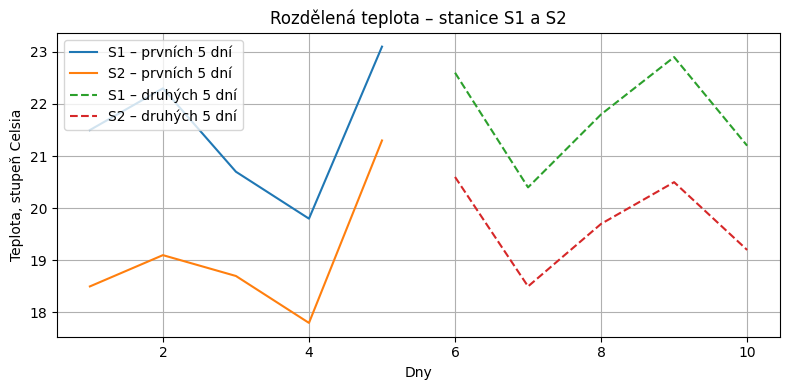

In [295]:
# Vykreslení
plt.figure(figsize=(8, 4))

# Část A
plt.plot(range(1, 6), a[0], label='S1 – prvních 5 dní')
plt.plot(range(1, 6), a[1], label='S2 – prvních 5 dní')

# Část B
plt.plot(range(6, 11), b[0], '--', label='S1 – druhých 5 dní')
plt.plot(range(6, 11), b[1], '--', label='S2 – druhých 5 dní')

plt.title("Rozdělená teplota – stanice S1 a S2")
plt.xlabel("Dny")
plt.ylabel("Teplota, stupeň Celsia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<details>
    <summary>▶️ Řešení</summary>

```python
stanice_c1_teploty = [21.5, 22.3, 20.7, 19.8, 23.1, 22.6, 20.4, 21.8, 22.9, 21.2]
stanice_c2_teploty = [18.5, 19.1, 18.7, 17.8, 21.3, 20.6, 18.5, 19.7, 20.5, 19.2]

stanice_c1_teploty_pole = np.array(stanice_c1_teploty)
stanice_c2_teploty_pole = np.array(stanice_c2_teploty)

spojene_teploty = np.concatenate((stanice_c1_teploty_pole, stanice_c2_teploty_pole))

upraveny_tvar = spojene_teploty.reshape(2, 10)
prvnich_pet_dni, dalsich_pet_dni = np.hsplit(upraveny_tvar, 2)

prumer_prvnich_deset_dni = np.mean(prvnich_deset_dni)
prumer_druhych_deset_dni = np.mean(dalsich_deset_dni)
```
</details>

<br>

## Univerzální funkce, UFUNCS

---

Výpočty na polích a maticích `numpy` mohou být **velmi rychlé** nebo **velmi pomalé**.

Klíčem k rychlé práci, je použití vektorizovaných operací, které jsou obvykle implementovány prostřednictvím *univerzálními funkcemi*.

Jde tedy o funkce, které pracují na objektech polí a matic, prvek po prvku.
Umožňují efektivní operace na polích, což vede k výrazně rychlejším výsledkům než pomocí běžných **Pythonových funkcí a cyklů**.

Ukázkou může být sčítání hodnot pro dvě dlouhé matice:

In [298]:
import numpy as np

In [299]:
pole_1 = np.random.randint(1, 100, size=10_000_000)

In [300]:
pole_2 = np.random.randint(100, 255, size=10_000_000)

In [301]:
pole_a = np.array([1, 2 ,3])
pole_b = np.array([4, 4, 4])

In [302]:
pole_a + pole_b

array([5, 6, 7])

In [303]:
pole_1 + pole_2

array([147, 225, 215, ..., 160, 204, 253])

<br>

Pro sečtení hodnot z obou polí můžeš pracovat s funkce `add`:

In [304]:
%timeit result_loop = [x + y for x, y in zip(pole_1, pole_2)]

1.87 s ± 85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [305]:
%timeit secteno_ufuncs = np.add(pole_1, pole_2)

21.8 ms ± 700 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<br>

Můžeš si všimnout, že řešení s výstupem v `secteno_ufuncs` je skoro 5~10x rychlejší.

<br>

Z důvodů použití dynamického, interpretovaného jazyka v rámci CPythonu ti jeho flexibilita neumožní kompilovat jednotlivé operace až na efektivní strojový kód (`01101101110101`).

Určitě existují derivace projektů jako *PyPy*, *Cython*, *Numba*.

### Úvod do UFUNCS

---

Pro mnoho typů operací poskytuje `numpy` praktické rozhraní právě pro tento typ operací,
staticky typované, zkompilované rutiny.

Jedná se o tzv. **vektorizované operace**.

Pro aplikace takových funkcí můžeš jednoduše vybrat konkrétní funkci a aplikovat ji na pole.

In [ ]:
pole_3 = np.arange(10)

In [ ]:
pole_4 = np.arange(11, 21)

In [ ]:
pole_3, pole_4

In [ ]:
pole_3 / pole_4

<br>

Počítání přes **ufuncs** je téměř pokaždé efektivnější než aplikace např. obyčejných smyček v Pythonu.

Kromě klasických operátorů, můžeš aplikovat samotné funkce:

In [ ]:
np.divide(pole_3, pole_4)

<br>

Výpis některých UFUNCS:

| Operátor | Jméno funkce | Popis |
| :- | :- | :- |
| `+` |  `np.add` |  Sčítání (př., `1 + 1 = 2` ) |
| `-` |  `np.subtract` | odčítání (př., `3 - 2 = 1` ) | 
| `-` | `np.negative` |  unární negace (př., `-2` ) | 
| `*` | `np.multiply` |  násobení (př., `2 * 3 = 6` ) |
| `/` | `np.divide` |  dělení (př., `3 / 2 = 1.5` ) |
| `//` |  `np.floor_divide` | celočíselné dělení (př., `3 // 2 = 1` ) |
| `**` | `np.power` | umocňování (př., `2 ** 3 = 8` ) | 
| `%` | `np.mod` | modulo (př., `9 % 4 = 1` ) |

<br>

Další kombinací můžeš pracovat třeba **s absolutními hodnotami**:

In [ ]:
negativni_cisla = np.array((-5, -4, -3, -2, -1))

In [ ]:
abs(negativni_cisla)

In [ ]:
type(abs)

<br>

Pomocí ufuncs použiješ funkci `absolute`, která je ekvivalentem v rámci `numpy`:

In [ ]:
np.absolute(negativni_cisla)

<br>

Práce s **exponenty** a **umocňování**:

In [ ]:
ciselne_hodnoty = np.arange(6)

In [ ]:
ciselne_hodnoty

In [ ]:
np.exp2(ciselne_hodnoty)      # 2^0, 2^1, 2^2, 2^3, ...

In [ ]:
np.power(3, ciselne_hodnoty)  # 3^0, 3^1, ...

<br>

Knihovna `numpy` potom nabízí další specializované funkce (logaritmické, trigonometrické, aj.)

<br>

##### **🧠 CVIČENÍ 🧠, procvič si základy UFUNCS v NUMPY**

Máte prodejní data dvou obchodů za poslední 3 měsíce. Každý obchod poskytuje seznam svých prodejů za každý měsíc. Vaším úkolem je:

In [ ]:
obchod_1_prodej = [1000, 1200, 1300]
obchod_2_prodej = [900, 1100, 1500]

In [ ]:
# Převést seznamy prodejů na NumPy pole.
import numpy as np

In [ ]:
# 1. Sloučit prodejní data obou obchodů do jednoho pole pomocí funkce concatenate

In [ ]:
# 2. Rozdělit sloučené pole na dvě části, které odpovídají měsícům ..
# .. pod sebou u obou obchodů

In [ ]:
# 3. Vypočítat celkový prodej pro každý měsíc

In [ ]:
# 4. Vypočítat procentuální změnu mezi prvním a druhým měsícem ..
# .. a mezi druhým a třetím měsícem mezi celkovými měs. součty

<details>
    <summary>▶️ Řešení</summary>
    
```python
obchod_1_prodej = [1000, 1200, 1300]
obchod_2_prodej = [900, 1100, 1500]

import numpy as np

# 1. Sloučit prodejní data obou obchodů do jednoho pole pomocí funkce concatenate
sloucene_prodeje = np.concatenate((obchod_1_prodej_pole, obchod_2_prodej_pole))

# 2. Rozdělit sloučené pole na dvě části, které odpovídají měsícům ..
# .. pod sebou u obou obchodů
rozdelene_po_mesicich = sloucene_prodeje.reshape(2, -1)

# 3. Vypočítat celkový prodej pro každý měsíc
mesic_1, mesic_2, mesic_3 = np.hsplit(rozdelene_po_mesicich, 3)
celkem_mesice = np.array((mesic_1.sum(), mesic_2.sum(), mesic_3.sum()))

# 4. Vypočítat procentuální změnu mezi prvním a druhým měsícem ..
# .. a mezi druhým a třetím měsícem mezi celkovými měs. součty
rozdily = np.diff(celkem_mesice)
np.divide(rozdily, celkem_mesice[:2]) * 100


### ALTERNATIVA
#Vstupní data
obchod_1_prodej = [1000, 1200, 1300]
obchod_2_prodej = [900, 1100, 1500]

# Převést seznamy prodejů na NumPy pole.
obchod_1_prodej_np = np.array( obchod_1_prodej )
obchod_2_prodej_np = np.array( obchod_2_prodej )


# Sloučit prodejní data obou obchodů do jednoho pole pomocí funkce concatenate
obchody_prodej = np.concatenate( [ obchod_1_prodej_np, obchod_2_prodej_np ] )
display( obchody_prodej )

# Rozdělit sloučené pole na dvě části, které odpovídají měsícům pod sebou u obou obchodů
rozdeleni_mesice = np.reshape( obchody_prodej, (-1, 3) ).T
display( rozdeleni_mesice )

# Vypočítat celkový prodej pro každý měsíc
celkove_prodeje = rozdeleni_mesice.sum( axis = 1 )
display( celkove_prodeje )

# Vypočítat procentuální změnu mezi prvním a druhým měsícem a mezi druhým a třetím měsícem
procentualni_zmena = ( np.diff( celkove_prodeje ) / celkove_prodeje[:2] * 100 ).round( 3 )
display( procentualni_zmena )
```
</details>

---